In [3]:
import pandas as pd
import numpy as np
import datetime as dt
from copy import deepcopy
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [8]:
df = pd.read_csv('./taxis.csv')

In [90]:
c = df.describe().columns

In [98]:
df[df.columns[~df.columns.isin(c)]]

,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,tot_cats
0,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,"(12.8, 14.16]"
1,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,"(8.8, 10.3]"
2,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,"(12.8, 14.16]"
3,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,"(33.06, 174.82]"
4,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,"(12.8, 14.16]"
...,...,...,...,...,...,...,...
6428,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan,"(1.2990000000000002, 8.8]"
6429,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx,"(33.06, 174.82]"
6430,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn,"(16.0, 18.5]"
6431,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn,"(1.2990000000000002, 8.8]"


In [16]:
# Exploratory Data Analysis
# Tables represent operations of the organization, check how the records were generated
df.info()    # looking for Dimensions; Column names; datatypes: ['categorical', 'numeric', 'datetime', 'timedelta']; Null values
df.head()    # get a sense of example values in the dataset
df.describe()    # quick summary statistics in the data - outliers need to be identified from here
# Co-efficient of variation sigma/mu - how large os the variation get a sense of the distribution of the data
df[[col1, col2]].value_counts()
df[col].unique()
df.nunique()

color
yellow    5373
green      968
Name: count, dtype: int64

In [10]:
# Data profiling
## Missing Values:
#### identifying missing values
df.info()
df[df[col].isna()]

#### Handling missing values
###### Dropping missing values
# DataFrame.dropna(*, axis=0, how=_NoDefault.no_default, thresh=_NoDefault.no_default, 
#                    subset=None, inplace=False, ignore_index=False)[source]

df = df.dropna(axis=0, how='all'/'any', thresh=int, subset=[col1, col2, col3], inplace=True)
df[df[col].notna()]


###### Imputation of missing values with mean
## fillna: 
## DataFrame.fillna(value=None, *, method=None, axis=None, inplace=False, limit=None, downcast=_NoDefault.no_default)[source]
## method{‘backfill’, ‘bfill’, ‘ffill’, None}, default None -- useful for timeseries data adding missing values
df[col].fillna(df[col].mean(), inplace=True)

###### Imputation of missing values with median
df[col].fillna(df[col].median(), inplace=True)
###### Imputation of missing values with median
df[col].fillna(df[col].mode(), inplace=True)


## Outlier:
#### Identifying outlier
#### Handling outliers
###### Dropping outliers
###### Winsorization -- setting it to a particular percentile. Looks at both ends not just the higher end



## Duplicates in the dataset:
#### Identifying duplicates
df.duplicated().sum()

#### Handling duplicates
df.drop_duplicates(keep='last')

df.index.isin([1,2])
df.index.is_unique()


## droppping columns from df
df.drop([col1, col2], axis=1, inplace=True)

In [ ]:
## transforming columns

df[col] = df[col].map(lambda x: x.srt.upper())
df[col] = df[col].map({'a':5, 'b':10})

df[col] = df[col].apply(func, args, axis=0)

In [ ]:
# filtering data set based on counts of categorical variables
# create a datafram from value_counts
s = df.pickup_borough.value_counts().to_frame()
s = s[s>100]
df[df.pickup_borough.isin(s.index)]

## Do type conversions to the correct data type and then re-run df.describe()
pd.to_numeric(errors='coerce')  # can also use errors='ignore'
pd.to_datetime(errors='coerce')  # can also use errors='ignore'
df[col].astype('int')  # can also use 'float', 'str'
df[['pickup', 'dropoff']] = df[['pickup', 'dropoff']].apply(pd.to_datetime, errors='raise', axis=0)
df[['distance', 'fare', 'tip', 'total']] = df[['distance', 'fare', 'tip', 'total']].apply(pd.to_numeric, errors='raise', axis=0)

In [ ]:
## Arithematic on dataframes
df = df1.add(df2, fill_value=0)
df = df1.sub(df2, fill_value=0)
df = df1.div(df2, fill_value=0)


In [ ]:
## Discretization & Binning
bins = [18, 25, 35, 60, 100]
df[col2] = pd.cut(df[col], bins, labels=['list', 'of', 'names'])

# categories based on qunatiles for continuous numerical data
df[col] = pd.qcut(df[col2], num_bins)
df[col] = df[col].ntile(10)


In [33]:
df['tot_cats'] = pd.qcut(df.total, 10)  #deciles
df['tot_cats'].value_counts()

tot_cats
(1.2990000000000002, 8.8]    738
(11.4, 12.8]                 667
(12.8, 14.16]                646
(18.5, 22.56]                642
(8.8, 10.3]                  635
(33.06, 174.82]              634
(16.0, 18.5]                 627
(22.56, 33.06]               624
(14.16, 16.0]                597
(10.3, 11.4]                 531
Name: count, dtype: int64

In [ ]:
## Sampling a data frame

df.sample(n=1000, replace=True)

# Creating indicator variables
pd.get_dummies(df[col])
# join to previous data frame based on indexes


In [87]:
s = pd.date_range('1/1/2000', periods=1000, freq='D')
s

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2002-09-17', '2002-09-18', '2002-09-19', '2002-09-20',
               '2002-09-21', '2002-09-22', '2002-09-23', '2002-09-24',
               '2002-09-25', '2002-09-26'],
              dtype='datetime64[ns]', length=1000, freq='D')

In [ ]:
# Filtering on timedelta columns
df = df[df.tot_delivery_time > dt.timedelta(minutes=0)]

# How to get time of day from a datetime colmn and group by various timeperiod during the day
df.time_col.dt.hour
# How to get day of week

# Month and year from date and group by

# How to plot and check for seasonality

## Upsampling and downsampling methods
resampler = ts.resample('H')   #upsampling
resampler = ts.resample('D', closed='right', label='right').sum()   #downsampling
resampler = ts.resample('D', closed='right', label='right').ohlc()   #downsampling

# Moving window functions
## rolling

s.rolling(30 ,min_periods=10).mean()

# date ranges in pandas
s = pd.date_range('1/1/2000', periods=1000, freq='D')




In [ ]:
# Filtering on a series based on values
s = df['Restaurant_ID'].value_counts().sort_values(ascending=False)
s = s[s>7]

In [ ]:
# Converting timedelta values to a float
df['tot_delivery_minutes'] = df['tot_delivery_time'] / pd.to_timedelta(1, unit='m')

In [ ]:
## Ranking values in a data frame
df.rank(axis='index')

In [ ]:
## Descriptive summary statistics
# count
# describe
# min, max
# argmin, argmax  # returns integers iloc
# idxmin, idxmax  #returns labels loc
# quantile
# sum
# mean
# median
# var
# std
cumsum
cummin
cummax
cumprod
diff
pct_change


df[col1].corr(df[col2])
df.corr()
df.corrwith(df[col])


In [ ]:
## String manipulation
## split('delim')
## strip()
## glue.join(list)

str1.replace(',', ':')

## Regular Expressions

## Vectorized string function
df.col.str.contains('abc')
df.col.str.extract(pattern, expand=True)
df.str.startswith()
df.str.endswith()
df.str.len()
df.str.match(pattern)  #returns True/False
df.str.replace(pattern, 'replace_with')  

In [ ]:
# unstack a series with multi index
s.unstack().stack()

df.sum(level=1, axis=1)

# Merging data frames

df = pd.merge(df1, df2, on=['key1', 'key2'], left_on='lkey', right_on='r_key', left_index=True, how='left', suffixes=('_left', '_right'))
left.join(right, how='outer')
pd.concat([df1, df2, df3], axis=1)

## Coalesce - combine first
## Long to wide pivot
## Wide to Long melt


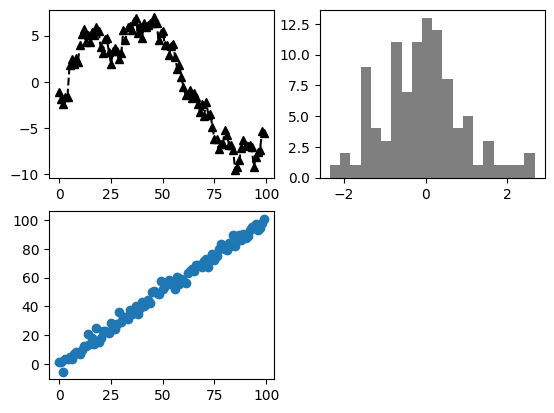

In [48]:
# Data visualization and plotting
fig = plt.figure()

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

ax1.plot(np.random.randn(100).cumsum(), 'k^--')
ax2.hist(np.random.randn(100), bins=20, color='k', alpha=0.5)
ax3.scatter(np.arange(100), np.arange(100)+3*np.random.randn(100))

[Text(0.5, 1.0, 'Random walk'),
 Text(0.5, 0, 'Stages'),
 Text(0, 0.5, 'value'),
 [],
 (0.0, 100.0),
 (0.0, 20.0)]

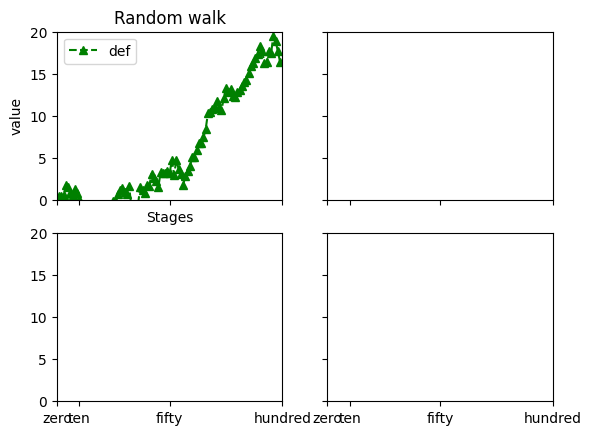

In [81]:
fig, axs = plt.subplots(2,2, sharex=True, sharey=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                   wspace=None, hspace=None)
ax = axs[0,0]
# ax.plot(x, y, 'g--')
ax.plot(np.random.randn(100).cumsum(), linestyle='--', color='g', marker = '^', label='def')
ax.legend(loc='best')
props = {
    'title': 'Random walk',
    'xlabel': 'Stages', 'ylabel':'value',
    'xticks':[0,10,50,100], 'xticklabels': ['zero','ten','fifty','hundred'],
    'xlim':[0,100], 'ylim':[0,20]
}
ax.set(**props)
fig

In [77]:
## Plotting with Pandas and seaborn
s.plot()
df.plot()  # by default will give line plots
df.plot.line()
df.plot.bar()

pd.crosstab(df[col1], df[col2], margins=True)   # by deafult gives counts

[Text(0.5, 1.0, 'Random walk'),
 Text(0.5, 224.90555555555557, 'Stages'),
 Text(4.444444444444445, 0.5, 'value'),
 [],
 (0.0, 50.0),
 (0.0, 5.0)]

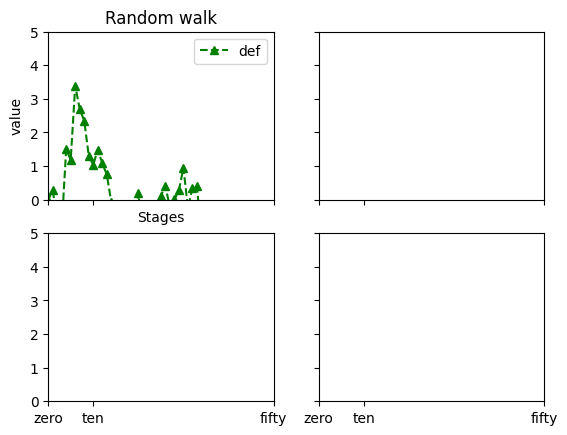

In [78]:
# Plottign using seaborn in a dataframe
import seaborn as sns

sns.barplot(x='tip_pct', y='day', data=df, orient='h', hue='time')
sns.distplot(values, bins=100, color='k')
sns.pairplot(df, diag_kind='kde', plot_kws={'alpha':0.5})
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=df1)

In [ ]:
##  group by
grouped.agg({'tip':['mean', 'max', 'sum'], 'tip_pct':'sum'})